In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import trimesh
from tqdm import tqdm

In [2]:
def G(face):
    idx_1, idx_2, idx_3 = face
    x1, y1, z1 = nodes[idx_1]
    x2, y2, z2 = nodes[idx_2]
    x3, y3, z3 = nodes[idx_3]
    Gravity = ((x1+x2+x3)/3,(y1+y2+y3)/3,(z1+z2+z3)/3)
    return Gravity

In [3]:
stl = trimesh.load('wheel_mesh.stl')

In [4]:
nodes = stl.vertices
faces = stl.faces

In [17]:
def graph_to_matrix(nodes,faces): 
    A_mat = np.zeros([len(nodes),len(nodes)])
    features = [[]]
    for node_n in tqdm(range(len(nodes))):
        for face in faces:
            if node_n in face:
                features[node_n].append(G(face)[0])
                features[node_n].append(G(face)[1])
                features[node_n].append(G(face)[2])
                for node_j in face:
                    A_mat[node_n,node_j] = 1       
        features.append([])

    f_mat = features[:-1]
    max_L = 0
    for i in range(len(f_mat)):
        if max_L <= len(f_mat[i]):
            max_L = len(f_mat[i])

    # Feature dimension을 맞춰주기위해서 0으로 padding을 넣어줬음
    for i in range(len(f_mat)):
        if len(f_mat[i]) < max_L : 
            for loop in range(max_L - len(f_mat[i])):
                f_mat[i].append(0)
    f_mat = np.array(f_mat)
    # 0~1사이로 스케일링
    f_mat = (f_mat - f_mat.min())/(f_mat.max() - f_mat.min())
    return A_mat, f_mat

In [ ]:
A_mat,F_mat = graph_to_matrix(nodes,faces)

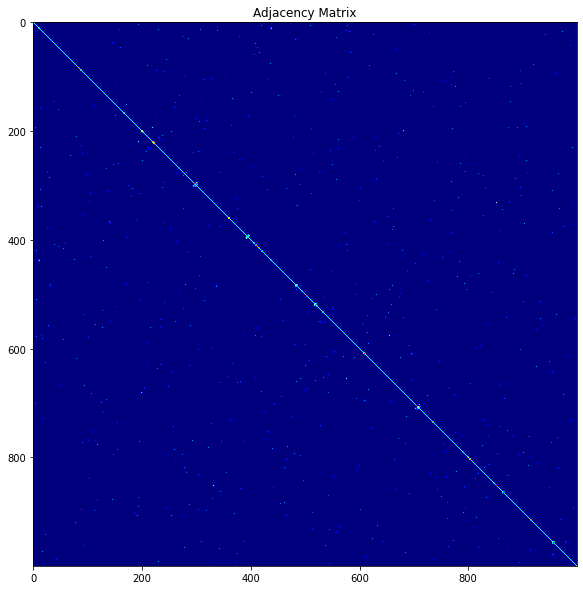

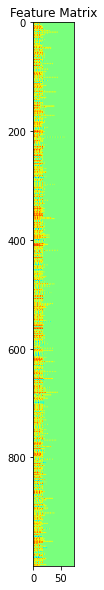

In [29]:
plt.figure(figsize=(10,10))
plt.title('Adjacency Matrix')
plt.imshow(A_mat[:1000,:1000],'jet')
plt.figure(figsize=(10,10))
plt.title('Feature Matrix')
plt.imshow(F_mat[:1000,:],'jet')